In [1]:
# Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
df = pd.read_csv("00-fruits.csv")
df

,Weight,Colour,Label
0,303,3,Banana
1,370,1,Apple
2,298,3,Banana
3,277,3,Banana
4,377,4,Apple
5,299,3,Banana
6,382,1,Apple
7,374,4,Apple
8,303,4,Banana
9,309,3,Banana


In [42]:
df.shape

(17, 3)

In [44]:
df.head()

,Weight,Colour,Label
0,303,3,Banana
1,370,1,Apple
2,298,3,Banana
3,277,3,Banana
4,377,4,Apple


In [46]:
df.describe()

,Weight,Colour
count,17.000000,17.000000
mean,334.058824,2.764706
std,37.332075,1.091410
min,277.000000,1.000000
25%,303.000000,3.000000
50%,311.000000,3.000000
75%,371.000000,3.000000
max,382.000000,4.000000


In [57]:
df.groupby('Label').size()

Label
Apple     8
Banana    9
dtype: int64

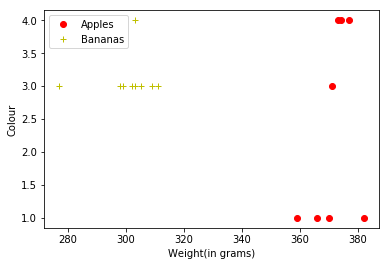

In [56]:
apples = df[df.Label == "Apple"]
bananas = df[df.Label == "Banana"]
plt.plot(apples.Weight, apples.Colour, "ro")
plt.plot(bananas.Weight, bananas.Colour, "y+")
plt.xlabel("Weight(in grams)")
plt.ylabel("Colour")
plt.legend(["Apples", "Bananas"])
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
scaler.fit(df.drop('Label',axis=1))
scaled_features = scaler.transform(df.drop('Label',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Weight,Colour
0,-0.857566,0.222222
1,0.992372,-1.666667
2,-0.995621,0.222222
3,-1.575452,0.222222
4,1.185649,1.166667


In [17]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Label'],
                                                    test_size=0.30)

In [40]:
y_test

8     Banana
13    Banana
11     Apple
10     Apple
3     Banana
14     Apple
Name: Label, dtype: object

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn = KNeighborsClassifier(n_neighbors=5)

In [29]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [30]:
pred = knn.predict(X_test)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
print(confusion_matrix(y_test,pred))

[[1 2]
 [0 3]]


In [33]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

      Apple       1.00      0.33      0.50         3
     Banana       0.60      1.00      0.75         3

avg / total       0.80      0.67      0.62         6



In [26]:
error_rate = []

# Will take some time
for i in range(1,7):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

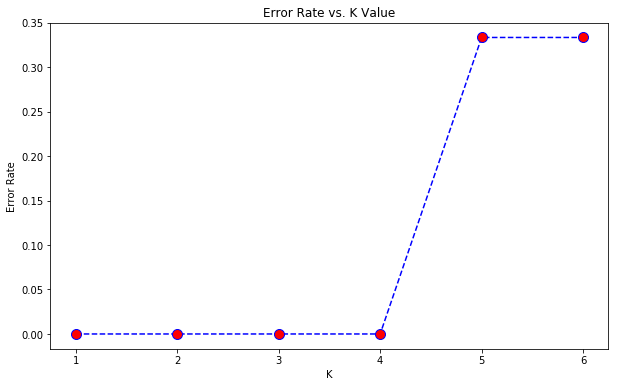

In [27]:
plt.figure(figsize=(10,6))
plt.plot(range(1,7),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')